# Fingerprints

Interconverting RDKit fingerprint formats.

In [2]:
from scipy.spatial.distance import pdist

from local_utils.rdkit_utils import FP

In [3]:
smi0 = 'CS(=O)(=O)CCNCc1oc(cc1)c2ccc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3c2'
smi1 = 'COCCOc1cc2ncnc(Nc3cccc(c3)C#C)c2cc1OCCOC'

In [4]:
# Get mols...

mol0, mol1 = [Chem.MolFromSmiles(x) for x in [smi0, smi1]]

In [5]:
# Get fingerprints...

FP0, FP1 = [FP(x) for x in [mol0, mol1]]

In [6]:
# Round trip conversion...
    
fp_as_string = ''.join("{}".format(x) for x in FP0.fp) # ASCII string of '0' and '1'

fp_as_bitvector = DataStructs.CreateFromBitString(fp_as_string) # RDKit ExplicitBitVect object from ASCII string

assert FP0.bv == fp_as_bitvector

# Convert to NumPy array...          

fp_as_array = np.zeros(2048, np.uint8)

DataStructs.ConvertToNumpyArray(fp_as_bitvector, fp_as_array)

assert all(fp_as_array == FP0.fp)

In [7]:
# Similarity via RDKit...

DataStructs.FingerprintSimilarity(FP0.bv, FP1.bv)

0.2765957446808511

In [8]:
# Similarity via scipy...

1.0 - pdist([FP0.fp, FP1.fp], metric='jaccard')[0]

0.27659574468085102

In [12]:
len(FP0.bv)

2048

In [13]:
len(FP0.fp)

2048

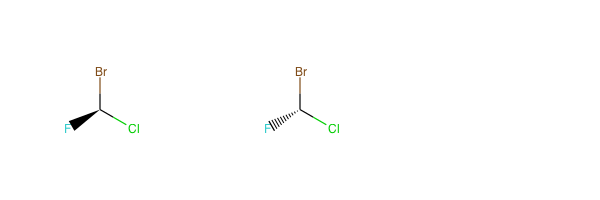

In [32]:
# Get mols...

mol0, mol1 = [Chem.MolFromSmiles(x) for x in ['F[C@H](Cl)Br', 'F[C@@H](Cl)Br']]
              
Draw.MolsToGridImage([mol0, mol1])

In [33]:
# Get fingerprints...

FP0, FP1 = [FP(x) for x in [mol0, mol1]]

assert (FP0.fp == FP1.fp).all(), 'Fingerprints not the same.'

In [34]:
assert FP0.bv == FP1.bv, 'Fingerprints not the same.'